# Importing of libraries and datasets

Let us first start off with importing the library and the required datasets.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Data Wrangling

In this particular section, we shall check if there is any issue with the data such as missing values. We shall also check the various data types of the entries.

In [3]:
df.isna().any()

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

Great ! So there are no null values that we are required to deal with. This shows that this particular is already very well pre-processed and we can move ahead with the exploratory data analysis section directly.


Let us finally check the various data types that we are dealing with in this particular dataframe.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


As we can see, features such as sales,quantity, discount and profits are either int or float. This makes sense since these are all numerical entries. Rest are objects which are mainly names of cities or categories of sold items. There is no requirement of data wrangling to be done since our dataframe is completely pre-processed. We can directly move ahead with the data visualisation section now.


# Data Visualisation

## Popular shipping modes

Let us first check which what are the modes of various orders placed at the firm.

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

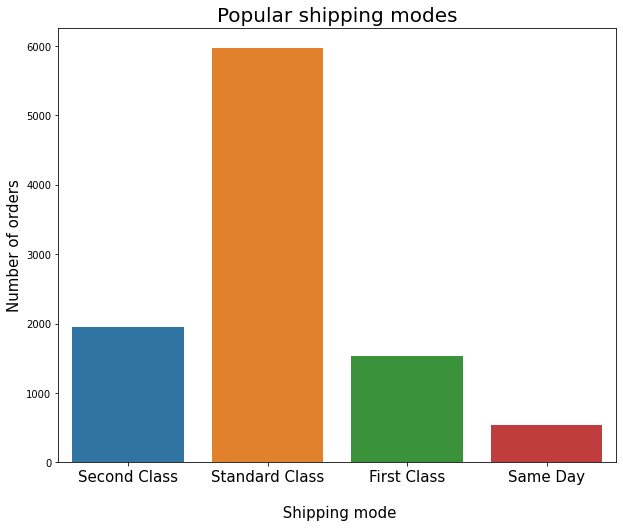

In [5]:
plt.figure(figsize=(10,8))
sns.countplot('Ship Mode',data=df)

plt.title('Popular shipping modes',size=20)
plt.xlabel('\n Shipping mode',size=15)
plt.ylabel('Number of orders',size=15)
plt.xticks(fontsize=15)



As we can see, the standard class shipping mode has been most utilised by our customers. This is because Standard class delivery will cost least while the premium for same day delivery is much higher. Hence, customers choosing same day delivery is the least.

## Shipping modes of each segment

Let us also check who are the primary customer segments of each of these different shipping modes.

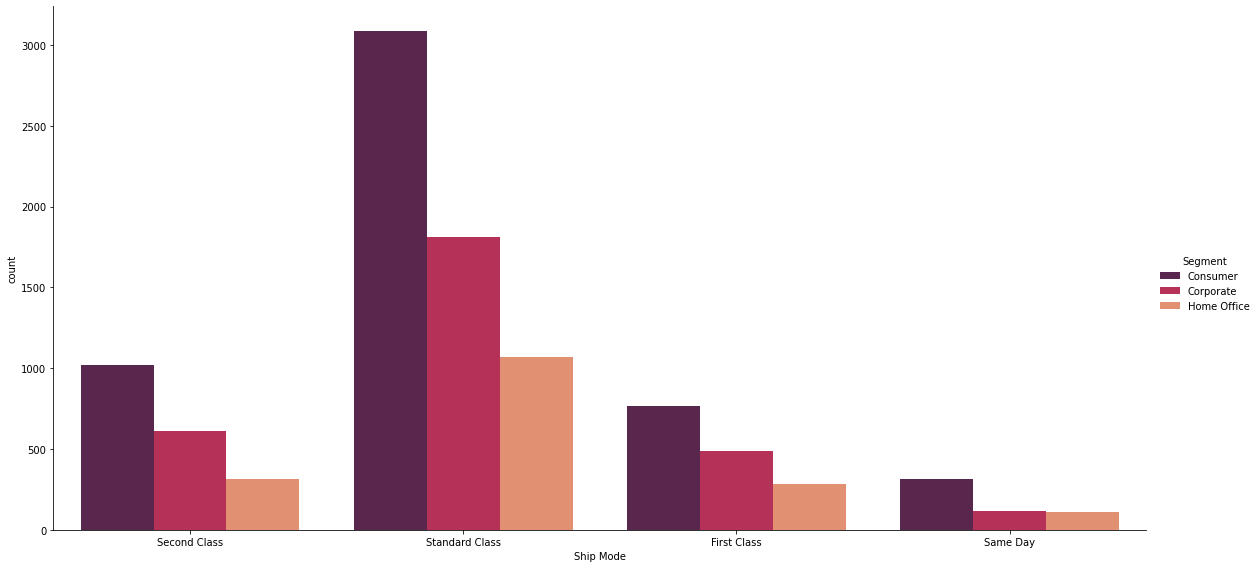

In [6]:
sns.catplot('Ship Mode',data=df,hue='Segment',kind='count',palette='rocket',aspect=2,height=8)

From the above plot, we see that maximum number of consumers opt for standard class delivery since they're usually in no rush to get their deliveries. However, it is also intersting to note that highest number of orders for same day delivery are also from consumers although in lower numbers. 

The reason could be because individual consumers will always be of greater number when compared to number of corporates or home offices. 

Let us check the total number of quantities ordered by each segment.

## Quantities ordered

In [7]:
df_quant=df.groupby('Segment')['Quantity'].sum().reset_index()

In [8]:
df_quant

,Segment,Quantity
0,Consumer,19521
1,Corporate,11608
2,Home Office,6744


Let us visualise the above data as a pie chart.

Text(0.5, 1.0, 'Quantities ordered by each segment')

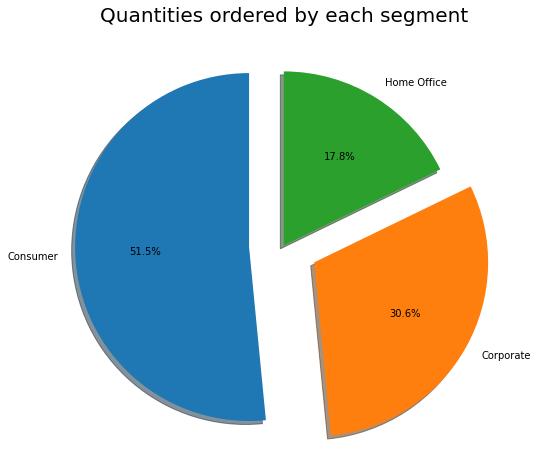

In [9]:
labels=df['Segment'].unique()
plt.figure(figsize=(10,8))
plt.pie(df_quant['Quantity'],autopct='%1.1f%%',labels=labels,shadow=True,explode=(0.2,0.2,0),startangle=90)
plt.title('Quantities ordered by each segment',size=20)

## Quantities ordered by each state

Next, let us check which states and cities have the highest orders.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

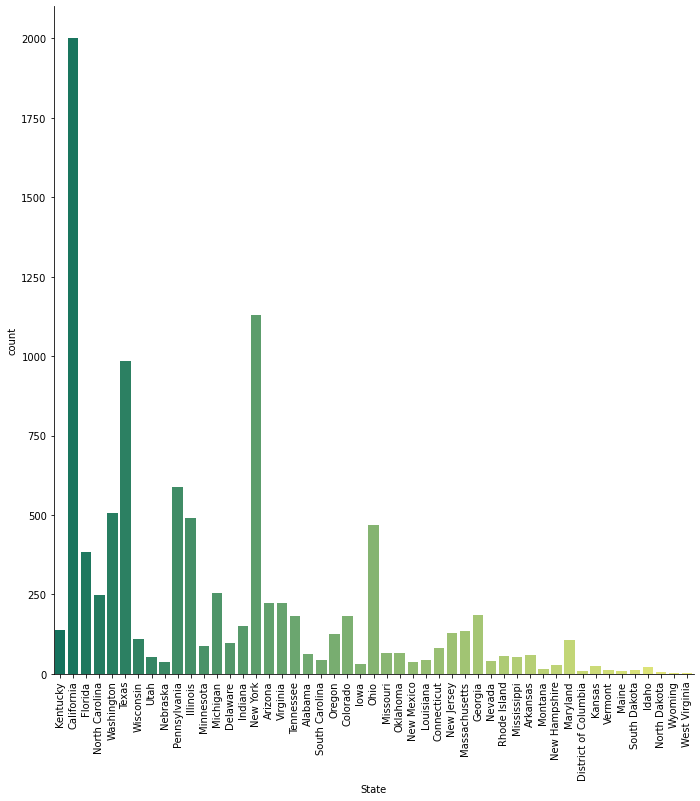

In [16]:

sns.catplot('State',kind='count',data=df,palette='summer',height=10,aspect=1)
plt.xticks(rotation=90)

Let us now check the top 10 cities with highest number of orders by quantities.

In [30]:
df_top10=df.groupby('City')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False)

## Top 10 cities with highest quantities ordered

In [32]:
df_top10=df_top10.head(10)
df_top10.reset_index(drop=True,inplace=True)
df_top10

,City,Quantity
0,New York City,3417
1,Los Angeles,2879
2,Philadelphia,1981
3,San Francisco,1935
4,Seattle,1590
5,Houston,1466
6,Chicago,1132
7,Columbus,836
8,San Diego,670
9,Springfield,649


Text(0.5, 6.799999999999997, 'City')

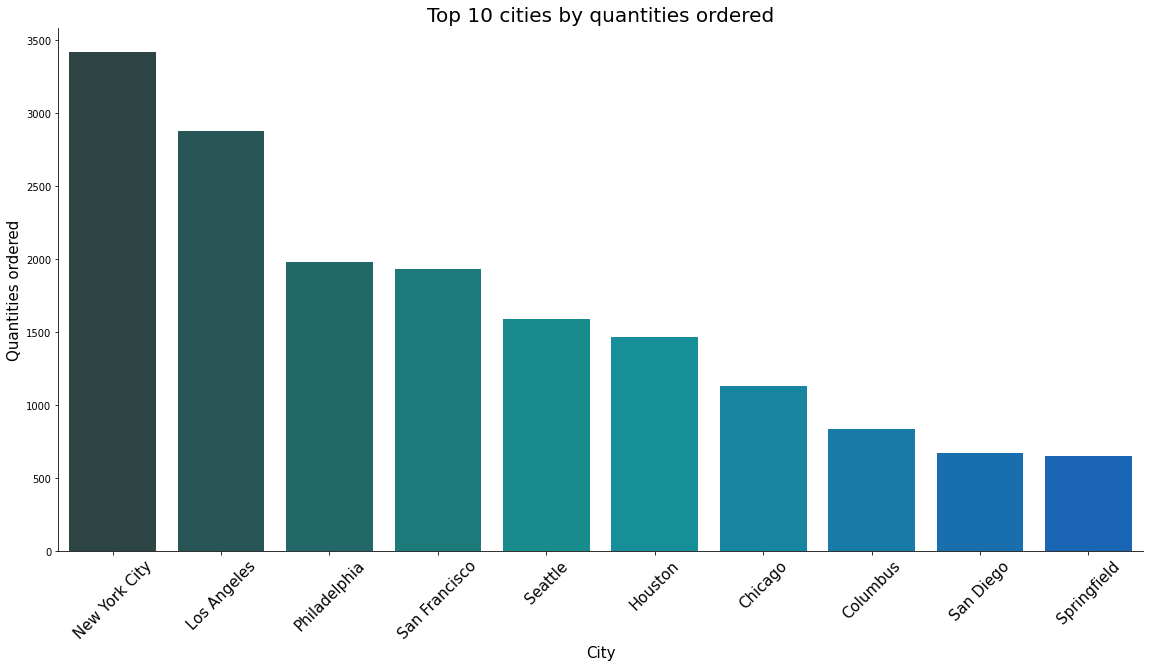

In [46]:
sns.catplot('City','Quantity',data=df_top10,kind='bar',height=8,aspect=2,palette='winter_d')
plt.xticks(size=15,rotation=45)
plt.title('Top 10 cities by quantities ordered',size=20)
plt.ylabel('Quantities ordered',size=15)
plt.xlabel('City',size=15)

Let us now check which regions have ordered the most number of quantities. This will help us understand where we must focus to improve our sales.

In [49]:
df_region=df.groupby('Region')['Quantity'].sum().reset_index()
df_region

,Region,Quantity
0,Central,8780
1,East,10618
2,South,6209
3,West,12266


## Quantities ordered region wise

Let us visualise the above values into a pie chart.

Text(0.5, 1.0, 'Quantities ordered by each region')

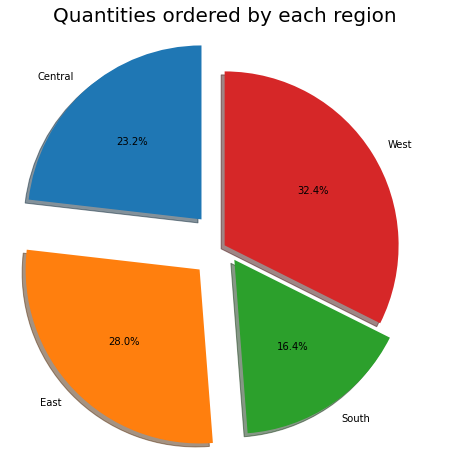

In [52]:
labels=df_region['Region'].unique()
plt.figure(figsize=(10,8))
plt.pie(df_region['Quantity'],autopct='%1.1f%%',labels=labels,shadow=True,explode=(0.2,0.2,0.1,0),startangle=90)
plt.title('Quantities ordered by each region',size=20)

The south region is a lagging a little behind on number of quantities sold. Western region sales have done the best.


## Most selling categories

Let us check which category of items are being ordered the highest in terms of quantities. We shall try to visualise the data using an pie char.

In [53]:
df_cats=df.groupby('Category')['Quantity'].sum().reset_index()
df_cats

,Category,Quantity
0,Furniture,8028
1,Office Supplies,22906
2,Technology,6939


Text(0.5, 1.0, 'Distribution of products sold')

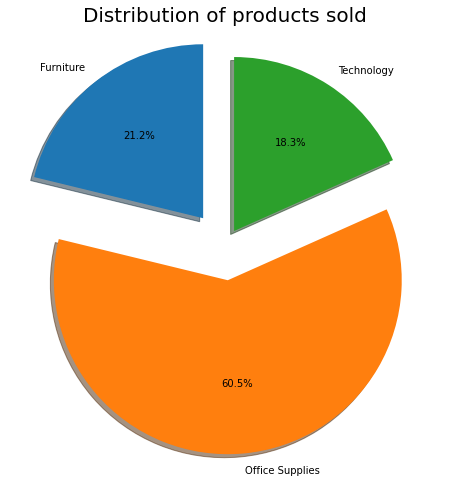

In [62]:
plt.figure(figsize=(10,8))
labels=df_cats['Category'].unique()
plt.pie(df_cats['Quantity'],autopct='%1.1f%%',labels=labels,shadow=True,explode=(0.2,0.2,0.1),startangle=90)

plt.title('Distribution of products sold',size=20)

As we can see, about 60.5 % sales are from office supplies followed by Furniture with 21.2 % and Technology products with 18.3 %.


## Sub-category orders

Let us now check the number  of each subcategory of products ordered.

Text(0.5, 1.0, 'Sub-Category orders placed')

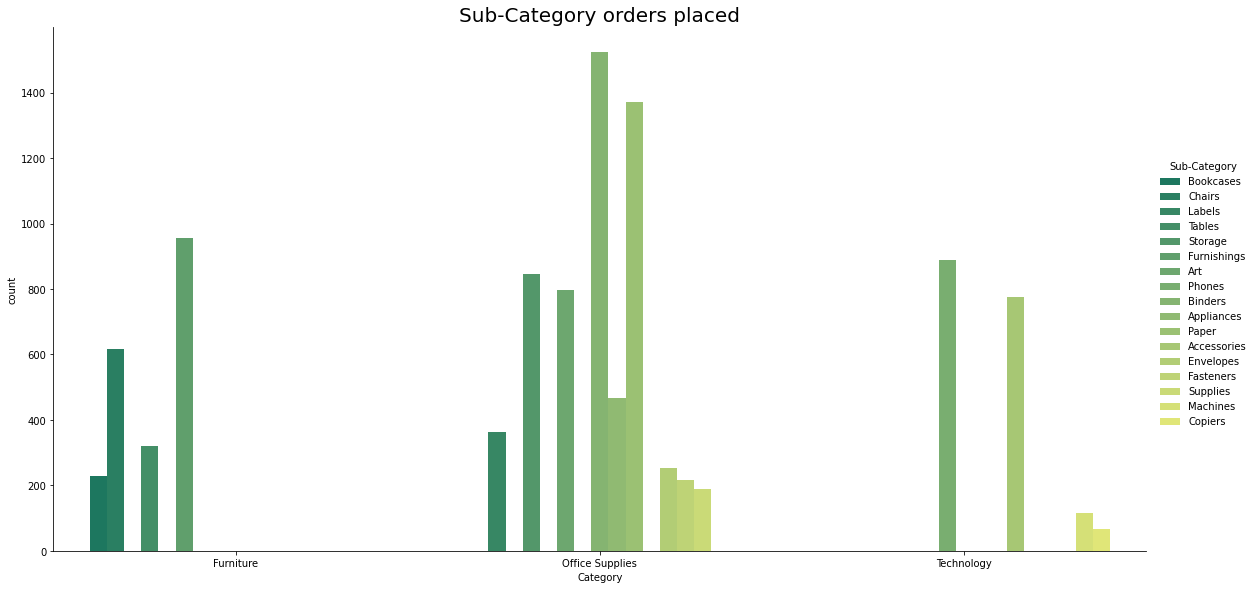

In [75]:
sns.catplot('Category',kind='count',hue='Sub-Category',data=df,height=8,aspect=2,palette='summer')
plt.title('Sub-Category orders placed',size=20)

From each of the catergories, the top selling subcategories are :

* Furniture: Furnishings
* Office supplies: Paper and binders
* Technology: Accessories 


## Profitable Categories

Let us check which categories had the highest profit.

In [81]:
df_prof=df.groupby('Category')['Profit'].sum().reset_index()

In [82]:
df_prof

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


Text(0.5, 1.0, 'Distribution of profits categorywise')

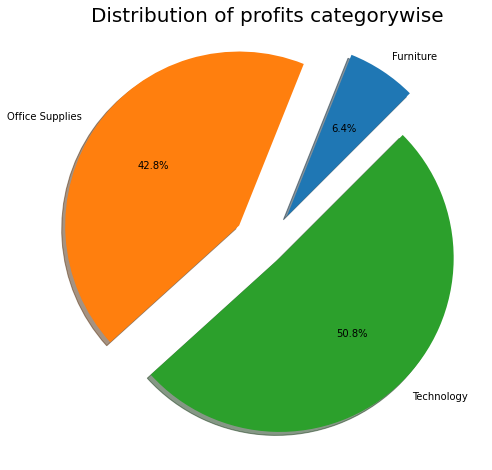

In [84]:
plt.figure(figsize=(10,8))
labels=df_prof['Category'].unique()
plt.pie(df_prof['Profit'],autopct='%1.1f%%',labels=labels,shadow=True,explode=(0.2,0.2,0.1),startangle=45)

plt.title('Distribution of profits categorywise',size=20)

From the given data, the profits made on technology item and office supplies are 50.8 % and 42.8 % respectively. Profits of furniture are a meagre 6.4 %.


## Top 10 profitable selling items

Let us check which are the top 10 profit making items being sold right now.

In [85]:
df_top10_items=df.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)

In [87]:
df_top10_items.reset_index(drop=True,inplace=True)


RangeIndex(start=1, stop=18, step=1)

In [89]:
df_top10_items=df_top10_items.head(10)

Text(0.5, 6.799999999999997, 'Products')

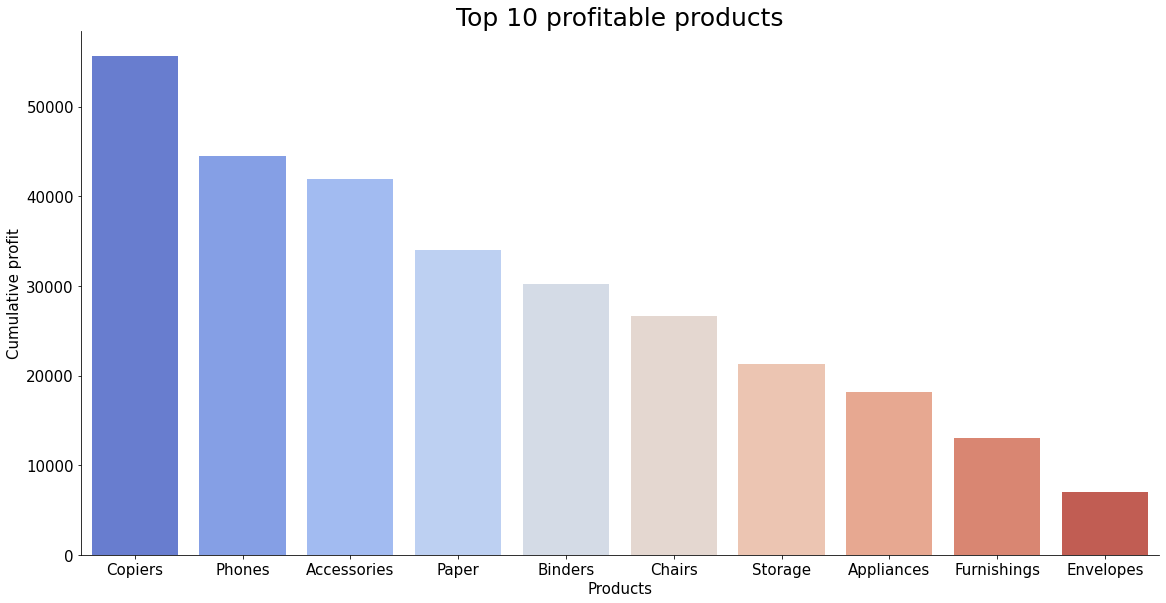

In [106]:
sns.catplot('Sub-Category','Profit',data=df_top10_items,kind='bar',aspect=2,height=8,palette='coolwarm')
plt.title('Top 10 profitable products',size=25)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Cumulative profit',size=15)
plt.xlabel('Products',size=15)


As we can see, copiers are the most profitable item sold by the company.


## Top profitable cities


Let us now check where are the profits mainly coming from. We will try to visualise the top 10 profitable cities.

In [107]:
df_top10_cities=df.groupby('City')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)

In [109]:
df_top10_cities=df_top10_cities.head(10)

Text(0.5, 6.799999999999997, 'City')

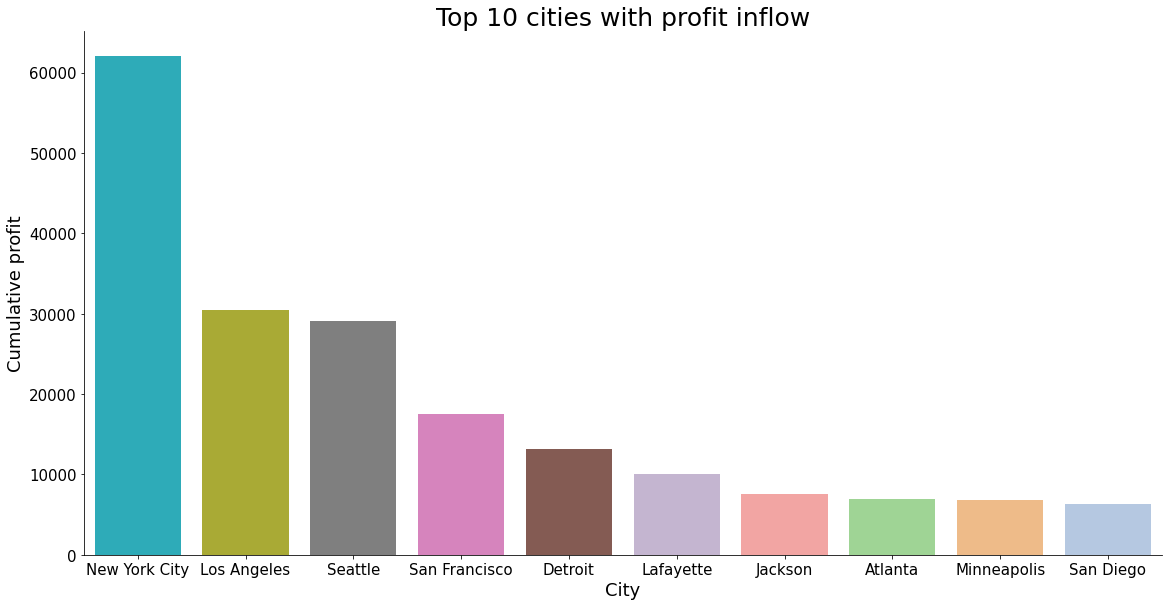

In [116]:
sns.catplot('City','Profit',data=df_top10_cities,kind='bar',aspect=2,height=8,palette='tab20_r')
plt.title('Top 10 cities with profit inflow',size=25)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Cumulative profit',size=18)
plt.xlabel('City',size=18)



NYC provides the highest profits followed by LA and Seattle. This is probably because a lot of large scale corporate offices are located in NY. Moreover, NY has a large wealthy aswell as dense population. Hence, revenue generation was always expected to be higher in this region.